# **Lab 6: optimization and learning**
**Jesper Lidbaum**

# **Abstract**

In this report, we present the Gradient descent method for finding local minimum points on a function $f : \mathcal{R}^n → \mathcal{R}$. We also use Newtons method to find a local minimum by finding the root of the gradient.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [79]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Jesper Lidbaum (jlidbaum@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need 
additional modules, this is where you add them. 

In [80]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D
import random

# **Introduction**

The idea for the algorithm Gradient descent is that we move down the gradient with some step size until the gradient becomes sufficiently close to zero, then we have reached a stationary point. There are two things to consider with the algorithm, first is the step size. If the step size is too large we could miss a stationary point and if it is too small it will take a long time to converge. The step size could be calculated in each step or be chosen at the start. In this lab, it is chosen from the start to be some small constant.

The code is based on algorithm 15.1 in the course book, but with a constant step size.

We also use Newtons method to find stationary points. To do that we need to solve for when the gradient is zero. This is done with the Hessian matrix. The algorithm in this report is based on 15.3 from the course book.

# **Method**

## Gradient descent
Here we present the code for the algorithm. The code takes a function and its gradient function $Df : \mathcal{R}^n → \mathcal{R}^n$, a starting point, a step size, a tolerance, and max_iterations. The code is based on algorithm 15.1 in the course book, but with a constant step size.

In [81]:
def gradient_descent(f, Df, x0, alpha, TOL , max_iter = 10000):
    x = x0
    while(np.linalg.norm(Df(x)) > TOL and max_iter > 0):
        x = x - alpha * Df(x)
        max_iter = max_iter - 1
    return x

## Newtons method

In this method we use a generalization of newtons method in more variables. However we want to find a stationary point which is the same as solving for a root of the gradient. The algorithm presented here is based on 15.3 in the course book. Local changes of the gradient are described by the Hessian of the function and we use that to find where $\nabla f = 0$. The iteration step is described by $x_{n+1} = x_{n} - (Hf(x_{n})^{-1})\nabla f(x_{n})$ we let the iteration step be $\Delta \vec{x} = -(Hf(x_{n})^{-1})\nabla f(x_{n})$ then we can solve for $\Delta x$ with $-Hf(x_{n})\Delta \vec{x} = \nabla f(x_{n})$.

In [82]:
def newton_minimization(Df, Hf, x0, TOL, max_iter = 100):
    x = x0
    while(np.linalg.norm(Df(x)) > TOL and max_iter > 0):
        dx = np.linalg.solve(Hf(x), -Df(x))
        x = x + dx
        max_iter = max_iter - 1
    return x

# **Results**
Here we test the algorithms.

## Gradient descent
We test gradient descent it against the cubic function $ax^3 + bx^2 + cx + d$ which we can determine the exact stationary points with the derivative. We also test it against the 2 dimensional polynomial $(x-a)^2 + (y-b)^2$ which has the global minimum $(a,b)$. Lastly we plot the convergence for the 2 dimensional polynomial. We can see for the first test that it converges to one of the solutions since there could be several stationary points. For the second one we see that it converges to the global minimum. In the plot of the error where we start quite far from the solution we can see that it takes quite some iterations to get there. 

The real solutions are:  0.0 0.0
The solution found by gradient descent is:  0
The error is:  0.0 0.0


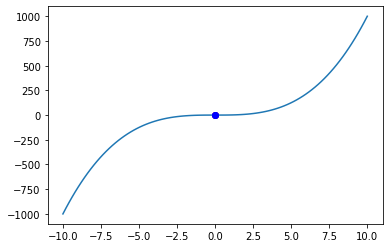

The real solutions are:  0.6666666666666666 0.0
The solution found by gradient descent is:  0
The error is:  0.6666666666666666 0.0


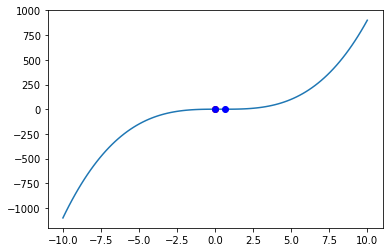

The real solutions are:  0.0 -0.6666666666666666
The solution found by gradient descent is:  0
The error is:  0.0 0.6666666666666666


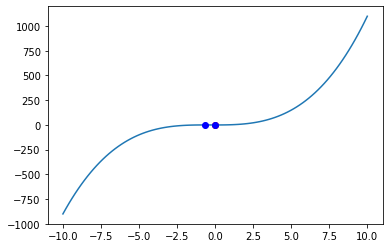

The real solution is:  1 1
The solution found by gradient descent is:  [0.99996465 0.99996465]
The error is:  3.534853271514038e-05 3.534853271514038e-05
The real solution is:  1 -1
The solution found by gradient descent is:  [ 0.99996465 -0.99996465]
The error is:  3.534853271514038e-05 3.534853271514038e-05
The real solution is:  -100 100
The solution found by gradient descent is:  [-99.9999647  99.9999647]
The error is:  3.529773938737435e-05 3.529773938737435e-05


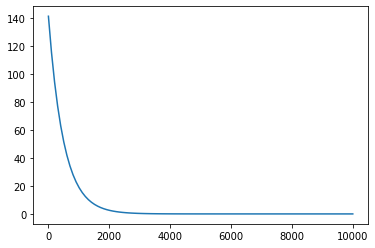

In [83]:
def test_gradient_descent(a, b, c, d):
    f = lambda x: a * x**3 + b * x**2 + c*x + d
    Df = lambda x: 3 * a * x**2 + 2 * b * x + c
    #Plot the function with pyplot
    x = np.linspace(-10, 10, 100)
    y = f(x)
    plt.plot(x,y)
    if(b**2/(9 * a **2) - c/(3 * a) < 0):
        print("No real solutions")
    else:
        real_olution1 = -b/(3 * a) + np.sqrt(b**2/(9 * a **2) - c/(3 * a))
        real_solution2 = -b/(3 * a) - np.sqrt(b**2/(9 * a **2) - c/(3 * a))
        solution = gradient_descent(f, Df, 0, 0.001, 0.0001)
        #Plot the solutions points with pyplot
        plt.plot(solution, f(solution), 'ro')
        plt.plot(real_olution1, f(real_olution1), 'bo')
        plt.plot(real_solution2, f(real_solution2), 'bo')
        print("The real solutions are: ", real_olution1, real_solution2)
        print("The solution found by gradient descent is: ", solution)
        print("The error is: ", np.abs(real_olution1 - solution), np.abs(real_solution2 - solution))
    plt.show()

        
def test_gradient_descent2(a, b):
    f = lambda x : (x[0]- a)**2 + (x[1] - b)**2
    Df = lambda x : np.array([2 * (x[0] - a), 2 * (x[1] - b)])
    print("The real solution is: ", a, b)
    solution = gradient_descent(f, Df, np.array([0, 0]), 0.001, 0.0001)
    print("The solution found by gradient descent is: ", solution)
    print("The error is: ", np.abs(a - solution[0]), np.abs(b - solution[1]))

def test_gradient_descent3(a, b):
  x = np.linspace(1, 10000, 100)
  y = np.zeros(x.size)
  f = lambda x : (x[0]- a)**2 + (y[1] - b)**2
  Df = lambda x : np.array([2 * (x[0] - a), 2 * (x[1] - b)])
  for i in range(x.size):
    y[i] = np.linalg.norm(np.array([a,b]) - gradient_descent(f, Df, np.array([0, 0]), 0.001, 0.0001, x[i]))
  
  plt.plot(x,y)
  plt.show()

test_gradient_descent(1, 0, 0, 0)
test_gradient_descent(1, -1, 0, 1)
test_gradient_descent(1, 1, 0, -1)

test_gradient_descent2(1, 1)
test_gradient_descent2(1, -1)
test_gradient_descent2(-100, 100)


test_gradient_descent3(-100, 100)

## Newtons method
Here we test newtons method. We test the convergence and error against the polynomial $f(x,y) = (a - x^2) + (b - y^2) + c$ which has.
$$\nabla f = \begin{bmatrix} 2(x-a) & 2(y - b) \end{bmatrix}^T$$
$$Hf = \begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}$$
And a global minimum $\begin{bmatrix} a & b \end{bmatrix}^T$.
We also test against the function $f(x,y) = sin(x) - sin(y)$ which has
$$
\nabla f = \begin{bmatrix} cos(x) & -cos(y) \end{bmatrix}^T
$$
$$ Hf = \begin{bmatrix}
-sin(x) & 0 \\
0 & sin(y)
\end{bmatrix}
$$
There are many stationary point for this but we attempt to get $(\pi/2, -\pi/2)^T$ so we start close to there.

We can see that we converge very quickly to the solution.

Error by iteration, real solution: 1, -1


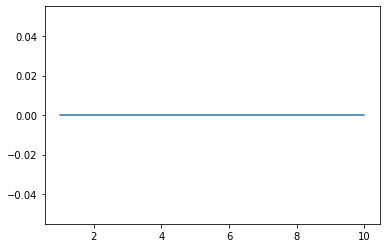

Error by iteration, real solution: -100, 100


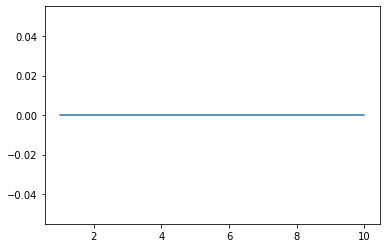

Error by iteration, real solution: -10000, 10000


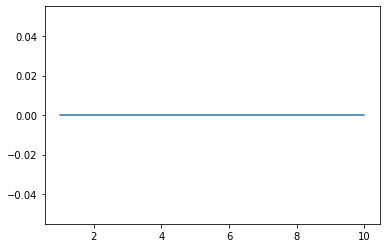

Error by iteration, real solution: $(\pi/2, -\pi/2)^T$


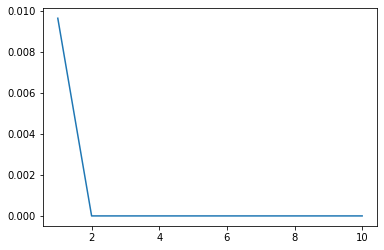

In [84]:
def test_newton_minimization(a, b):
    x = np.linspace(1, 10, 10)
    y = np.zeros(x.size)
    Df = lambda x : np.array([2 * (x[0] - a), 2 * (x[1] - b)])
    Hf = lambda x : np.array([[2, 0], [0, 2]])
    for i in range(x.size):
      y[i] = np.linalg.norm(np.array([a,b]) - newton_minimization(Df, Hf, np.array([0, 0]), 0.000001, x[i]))
    print("Error by iteration, real solution: " + str(a) + ", " +str(b))
    plt.plot(x,y)
    plt.show()

def test_newton_minimization2():
    x = np.linspace(1, 10, 10)
    y = np.zeros(x.size)
    Df = lambda x : np.array([np.cos(x[0]), -np.cos(x[1])])
    Hf = lambda x : np.array([[-np.sin(x[0]), 0], [0, np.sin(x[1])]])
    for i in range(x.size):
      y[i] = np.linalg.norm(np.array([np.pi/2,-np.pi/2]) - newton_minimization(Df, Hf, np.array([1.3, -1.3]), 0.000001, x[i]))
    print("Error by iteration, real solution: $(\pi/2, -\pi/2)^T$")
    plt.plot(x,y)
    plt.show()
    
test_newton_minimization(1, -1)
test_newton_minimization(-100, 100)
test_newton_minimization(-10000, 10000)
test_newton_minimization2()


# **Discussion**
Gradient descent is a method that can prove effective to find the local minimum points. However, you have to consider some parameters. The starting position will impact what local minimum we find if there exist several. The step size is also important. A better implementation could use line search to determine the step size in each step which will help with convergence and not overshooting the solution. As we saw with the last plot we could have benefited from a larger step size in the begning to get better convergence.

The convergence of Newton's method was not that surprising given that it is quadratic. But again you have to be mindful if there is more than one solution since you will only converge on one.